In [138]:
import pandas as pd
import numpy as np 
import requests
import csv
import json
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [139]:
#save data into a csv located in same repo
url_btc = "https://www.cryptodatadownload.com/cdd/Bitstamp_BTCUSD_d.csv"
url_eth = "https://www.cryptodatadownload.com/cdd/Bitstamp_ETHUSD_d.csv"
url_ltc = "https://www.cryptodatadownload.com/cdd/Bitstamp_LTCUSD_d.csv"
url_xrp = "https://www.cryptodatadownload.com/cdd/Bitstamp_XRPUSD_d.csv"
url_bch = "https://www.cryptodatadownload.com/cdd/Bitstamp_BCHUSD_d.csv"
data_btc = pd.read_csv(url_btc)
df_btc = pd.DataFrame(data_btc)
df_btc.to_csv('btc.csv')
data_eth = pd.read_csv(url_eth)
df_eth = pd.DataFrame(data_eth)
df_eth.to_csv('eth.csv')
data_ltc = pd.read_csv(url_ltc)
df_ltc = pd.DataFrame(data_ltc)
df_ltc.to_csv('ltc.csv')
data_xrp = pd.read_csv(url_xrp)
df_xrp = pd.DataFrame(data_xrp)
df_xrp.to_csv('xrp.csv')
data_bch = pd.read_csv(url_bch)
df_bch = pd.DataFrame(data_bch)
df_bch.to_csv('bch.csv')
#data_bch

In [140]:
#pull data from csv and organise it into desired dataframe for btc
csv_btc = pd.read_csv('btc.csv', header= 1,)
df2_btc = pd.DataFrame(csv_btc)
df2_btc.index = pd.to_datetime(df2_btc['date'])
df3_btc = pd.DataFrame(df2_btc['close'])
df3_btc['volume_usd'] = df2_btc['Volume USD'].astype(int)
daily_pct_change_btc = df3_btc['close'].pct_change()
df3_btc['daily_pct_change'] = daily_pct_change_btc
weekly_pct_change_btc = df3_btc['close'].pct_change(periods = 5)
df3_btc["weekly_pct_change_btc"] = weekly_pct_change_btc
#df3_btc = df3_btc.dropna()

# Repeat for ETH
csv_eth = pd.read_csv('eth.csv', header=1)
df2_eth = pd.DataFrame(csv_eth)
df2_eth.index = pd.to_datetime(df2_eth['date'])
df3_eth = pd.DataFrame(df2_eth['close'])
df3_eth['volume_usd'] = df2_eth['Volume USD'].astype(int)
daily_pct_change_eth = df3_eth['close'].pct_change()
df3_eth['daily_pct_change'] = daily_pct_change_eth
weekly_pct_change_eth = df3_eth['close'].pct_change(periods=5)
df3_eth["weekly_pct_change_eth"] = weekly_pct_change_eth
#df3_eth = df3_eth.dropna()

# repeat for LTC
csv_ltc = pd.read_csv('ltc.csv', header=1)
df2_ltc = pd.DataFrame(csv_ltc)
df2_ltc.index = pd.to_datetime(df2_ltc['date'])
df3_ltc = pd.DataFrame(df2_ltc['close'])
df3_ltc['volume_usd'] = df2_ltc['Volume USD'].astype(int)
daily_pct_change_ltc = df3_ltc['close'].pct_change()
df3_ltc['daily_pct_change'] = daily_pct_change_ltc
weekly_pct_change_ltc = df3_ltc['close'].pct_change(periods=5)
df3_ltc["weekly_pct_change_ltc"] = weekly_pct_change_ltc
#df3_ltc =df3_ltc.dropna()

# Repeat for XRP
csv_xrp = pd.read_csv('xrp.csv', header=1)
df2_xrp = pd.DataFrame(csv_xrp)
df2_xrp.index = pd.to_datetime(df2_xrp['date'])
df3_xrp = pd.DataFrame(df2_xrp['close'])
df3_xrp['volume_usd'] = df2_xrp['Volume USD'].astype(int)
daily_pct_change_xrp = df3_xrp['close'].pct_change()
df3_xrp['daily_pct_change'] = daily_pct_change_xrp
weekly_pct_change_xrp = df3_xrp['close'].pct_change(periods=5)
df3_xrp["weekly_pct_change_xrp"] = weekly_pct_change_xrp
#df3_xrp =df3_xrp.dropna()
# Repeat for BCH
csv_bch = pd.read_csv('bch.csv', header=1)
df2_bch = pd.DataFrame(csv_bch)
df2_bch.index = pd.to_datetime(df2_bch['date'])
df3_bch = pd.DataFrame(df2_bch['close'])
df3_bch['volume_usd'] = df2_bch['Volume USD'].astype(int)
daily_pct_change_bch = df3_bch['close'].pct_change()
df3_bch['daily_pct_change'] = daily_pct_change_bch
weekly_pct_change_bch = df3_bch['close'].pct_change(periods=5)
df3_bch["weekly_pct_change_bch"] = weekly_pct_change_bch
#df3_bch = df3_bch.dropna()
#df3_bch

In [141]:
'''df3_bch.reset_index(inplace = True)
sns.lineplot(x = 'date', y = 'daily_pct_change' "", data = df3_bch)
plt.show()'''

'df3_bch.reset_index(inplace = True)\nsns.lineplot(x = \'date\', y = \'daily_pct_change\' "", data = df3_bch)\nplt.show()'

In [142]:
'''fig, ax = plt.subplots()
sns.lineplot(x='date', y='daily_pct_change', data=df3_bch, ax=ax)

Plot the second line plot (weekly_pct_change_bch)
sns.lineplot(x='date', y='daily_pct_change', data=df3_xrp, ax=ax)
plt.show()'''

"fig, ax = plt.subplots()\nsns.lineplot(x='date', y='daily_pct_change', data=df3_bch, ax=ax)\n\nPlot the second line plot (weekly_pct_change_bch)\nsns.lineplot(x='date', y='daily_pct_change', data=df3_xrp, ax=ax)\nplt.show()"

<Axes: xlabel='date'>

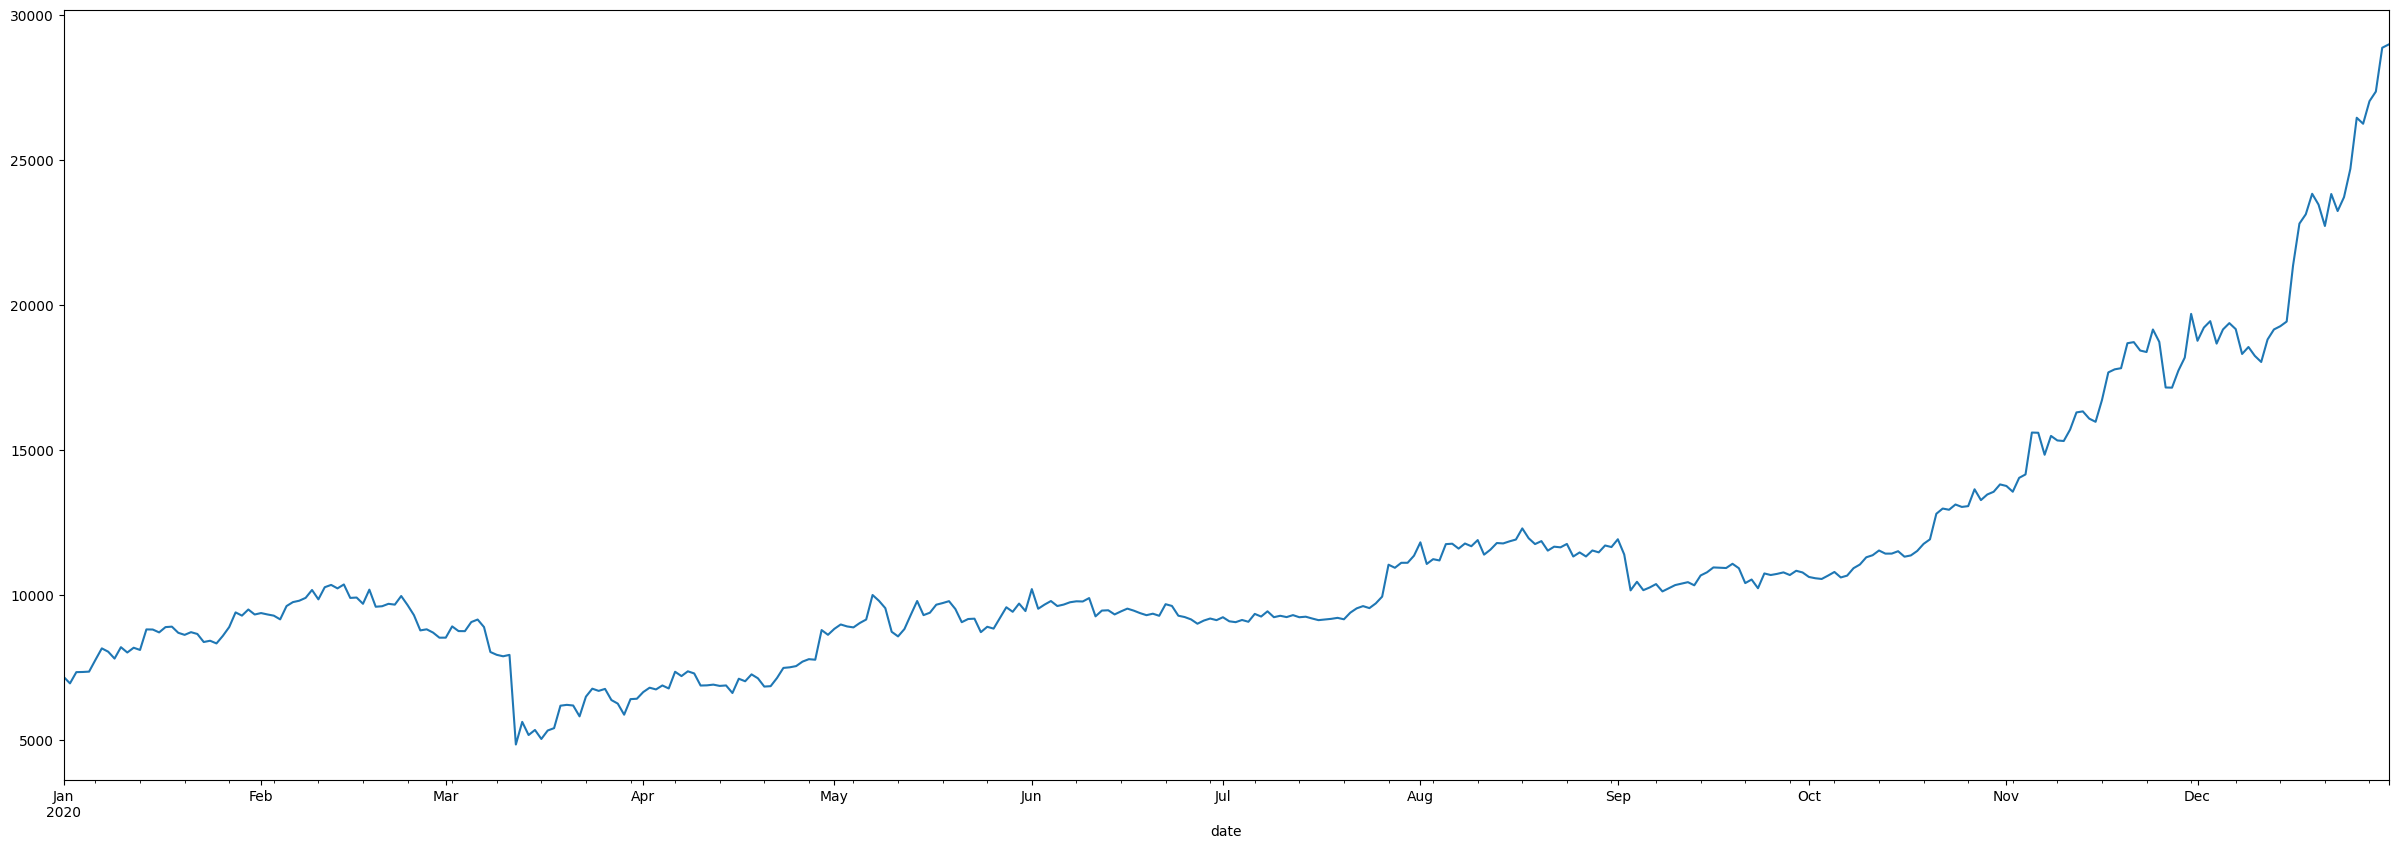

In [143]:
df3_btc['close'].loc['2020'].plot(figsize = (30,10))

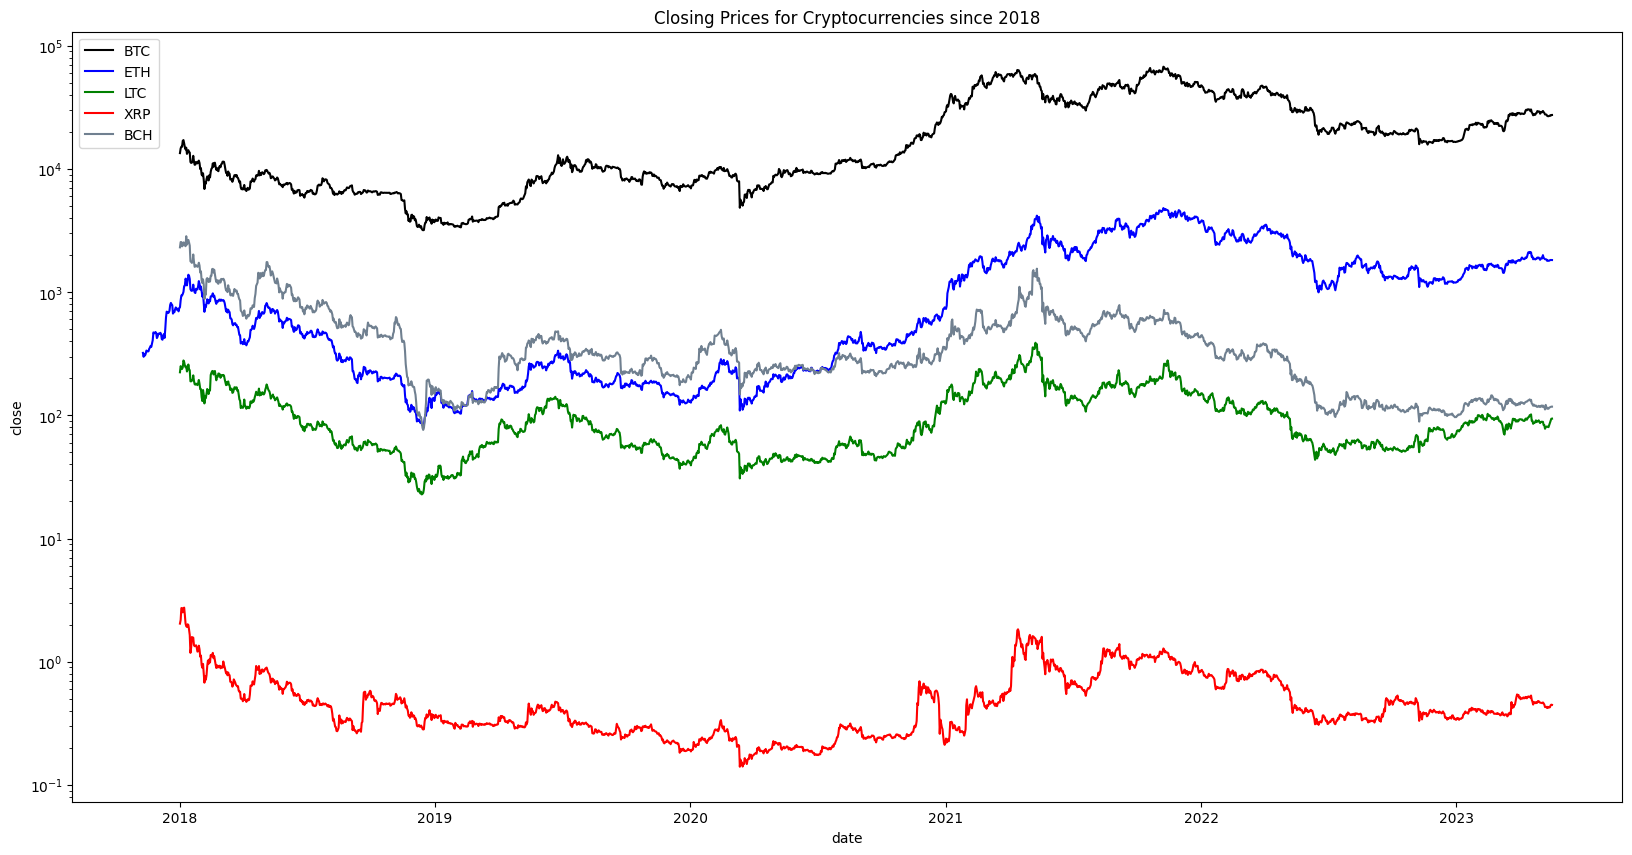

In [158]:
fig, ax = plt.subplots(figsize = (20,10))
sns.lineplot(x='date', y='close', data=df3_btc.loc['2018':], ax=ax, color = "black",label = "BTC")
ax.set_ylabel("close")
ax.set_yscale('log')
sns.lineplot(x='date', y='close', data=df3_eth, ax=ax, color = 'blue', label = "ETH")


sns.lineplot(x='date', y='close', data=df3_ltc.loc['2018':], ax=ax, color = 'green', label = "LTC")


sns.lineplot(x='date', y='close', data=df3_xrp.loc['2018':], ax=ax ,color = 'red',  label = "XRP")


sns.lineplot(x='date', y='close', data=df3_bch.loc['2018':], ax=ax, color = 'slategray', label = "BCH")
ax.set_title('Closing Prices for Cryptocurrencies since 2018')
ax.legend()
plt.show()